# Sebastian Majewski, badanie zależności ceny diamentu od pozostałych jego parametrów.

In [63]:
#cel - sprawdzamy czy cena diamentu zależy od jego pozostałych wartości cech fizycznych oraz jaka jest to zależność.

In [1]:
# wczytujemy niezbędne pakiety
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# wczytujemy dane
# dane pochodzą ze strony https://www.kaggle.com/shivam2503/diamonds
diamonds = pd.read_csv("dane/diamonds.csv", comment="#")
diamonds.head()

Index  carat      cut color clarity  depth  table  price     x     y     z
0      1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1      2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2      3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3      4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4      5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

carat - masa diamentu, 1 karat = 0,2 g (0.2--5.01)

cut - Opisuje jakość diamentu, sposób w jaki został wyszlifowany. Oznaczona w rosnącej kolejności - Fair, Good, Very Good, Premium, Ideal

color - Kolor diamentu, gdzie J oznacza najgorszy, a D najlepszy. (D, E, F, G, H, I, J) (diamenty oznaczone J mają lekko żółtawą barwę)

clarity - Przejrzystość diamentu, w kolejności od najlepszej do najgorszej - IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1

depth - Procentowo wyrażona wysokość diamentu (= z / mean(x, y) = 2 * z / (x + y) (43--79))

table - Procentowo wyrażony stosunek szerokości szczytu diamenti do jego średniej szerokości (43--95)

price - cena diamentu w dolarach (326USD-18,823USD)

x - długość w mm (0--10.74)

y - szerokość w mm (0--58.9)

z - wysokość w mm (0--31.8)

In [3]:
# usuwamy kolumnę z numeracją
diamonds = diamonds.drop(['Index'], axis=1)

Sprawdzenie jakosci danych



In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Zbiór nie posiada braków danych. Mamy 6 zmiennych typu float, 1 zmienną typu int oraz 3 zmienne typu object.

In [5]:
# usuwamy białe znaki ze zmiennych kategorycznych
diamonds['clarity'] = diamonds['clarity'].str.replace(" ", "")
diamonds['color'] = diamonds['color'].str.replace(" ", "")
diamonds['cut'] = diamonds['cut'].str.replace(" ", "")

In [6]:
# sprawdzamy czy w zmiennych kategorycznych istnieją odstające dane. 
# Np. czy nie ma jednej zmiennej zapisanej jako Premum zamiast Premium.
diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very_Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [7]:
diamonds.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [8]:
diamonds.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [9]:
# wyświetlamy podstawowe statystyki dla zmiennych numerycznych
diamonds.describe() 

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

Wszystkie zmienne znajdują się w przedziałach, jakie były zamieszczone w opisie zbioru danych, nie mamy żadnych wartości odstających.

In [10]:
# ponownie wyświetlamy statystyki, tym razem uwzględniając zmienne kategoryczne
diamonds.describe(include='all')

carat    cut  color clarity         depth         table  \
count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13065           NaN           NaN   
mean        0.797940    NaN    NaN     NaN     61.749405     57.457184   
std         0.474011    NaN    NaN     NaN      1.432621      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price             x             y             z  
count   53940.000000  53940.000000  53940.000000  53940.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     3932.799722      5.731157      5.734526      3.538734  
std      3989.439738      1.121761      1.142135      0.705699  
min       326.000000      0.000000      0.000000      0.000000  
25%       950.000000      4.710000      4.720000      2.910000  
50%      2401.000000      5.700000      5.710000      3.530000  
75%      5324.250000      6.540000      6.540000      4.040000  
max     18823.000000     10.740000     58.900000     31.800000

Dla pewności, że nie mamy odstających wartości, możemy przyjrzeć się histogramom poszczególnych zmiennych.

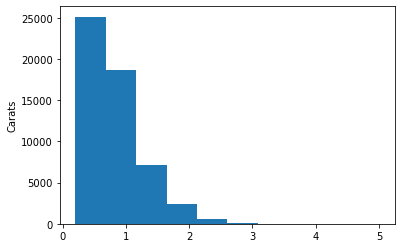

In [11]:
plt.hist(diamonds['carat'])
plt.ylabel('Carats')
plt.show()

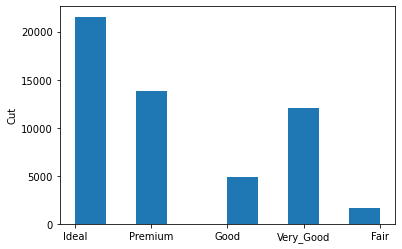

In [12]:
plt.hist(diamonds['cut'])
plt.ylabel('Cut')
plt.show()

Na powyższym histogramie widać, że najwięcej mamy diamentów o szlifie idealnym bądz premium.

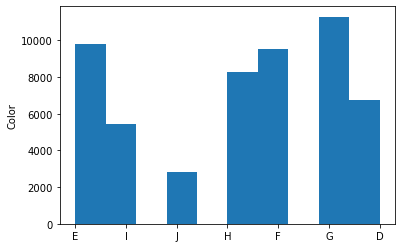

In [13]:
plt.hist(diamonds['color'])
plt.ylabel('Color')
plt.show()

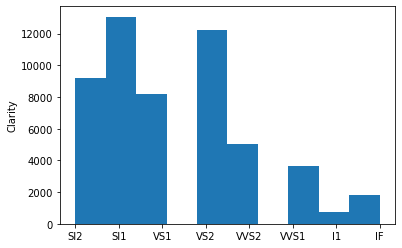

In [14]:
plt.hist(diamonds['clarity'])
plt.ylabel('Clarity')
plt.show()

Najmniej jest diamentów bez skazy (IF) oraz tych, które mają ich bardzo dużo (I1).

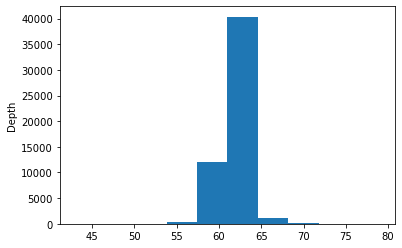

In [15]:
plt.hist(diamonds['depth'])
plt.ylabel('Depth')
plt.show()

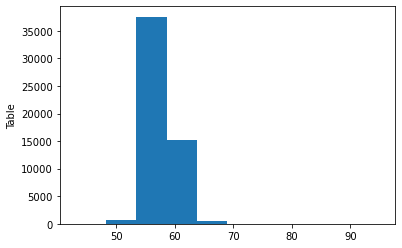

In [16]:
plt.hist(diamonds['table'])
plt.ylabel('Table')
plt.show()

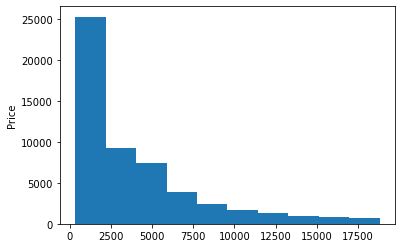

In [17]:
plt.hist(diamonds['price'])
plt.ylabel('Price')
plt.show()

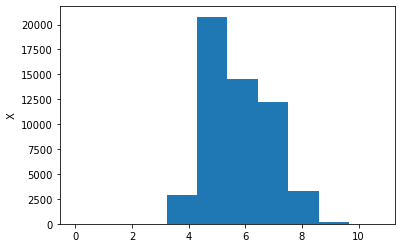

In [18]:
plt.hist(diamonds['x'])
plt.ylabel('X')
plt.show()

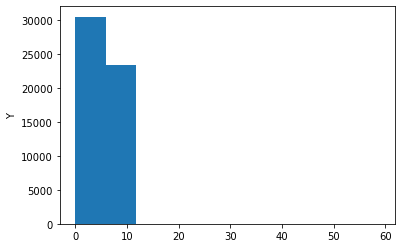

In [19]:
plt.hist(diamonds['y'])
plt.ylabel('Y')
plt.show()

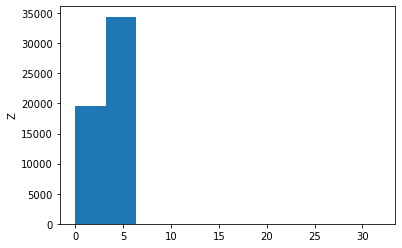

In [20]:
plt.hist(diamonds['z'])
plt.ylabel('Z')
plt.show()

Na żadnym z histogramów nie występują odstające wartości.

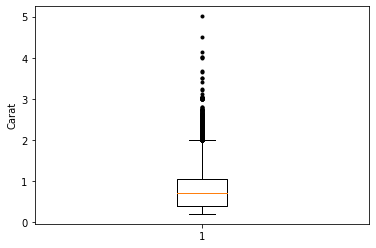

In [21]:
# sprawdzenie czy nie pomineliśmy wartości odstajacych możemy też wykonać przy pomocy box plot
# sprawdzamy tylko zmienne ciągłe
plt.boxplot(diamonds['carat'].dropna(), sym='k.') 
plt.ylabel('Carat')
plt.show()

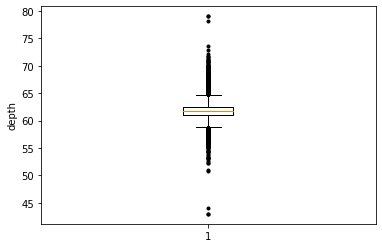

In [22]:
plt.boxplot(diamonds['depth'].dropna(), sym='k.') 
plt.ylabel('depth')
plt.show()

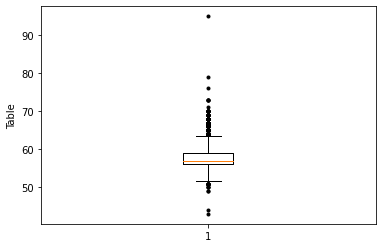

In [23]:
plt.boxplot(diamonds['table'].dropna(), sym='k.') 
plt.ylabel('Table')
plt.show()

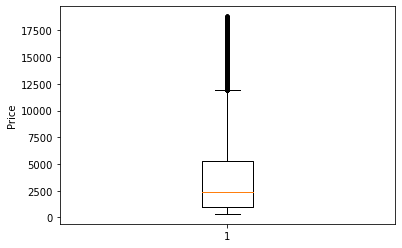

In [24]:
plt.boxplot(diamonds['price'].dropna(), sym='k.') 
plt.ylabel('Price')
plt.show()

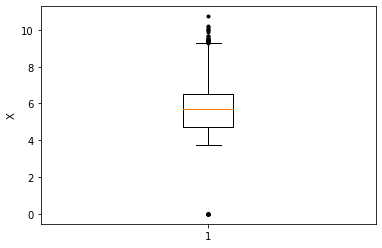

In [25]:
plt.boxplot(diamonds['x'].dropna(), sym='k.') 
plt.ylabel('X')
plt.show()

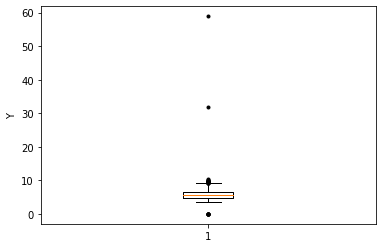

In [26]:
plt.boxplot(diamonds['y'].dropna(), sym='k.') 
plt.ylabel('Y')
plt.show()

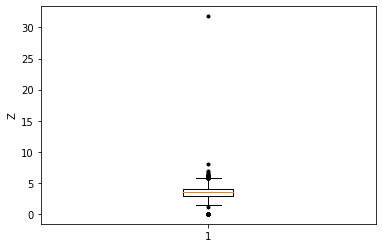

In [27]:
plt.boxplot(diamonds['z'].dropna(), sym='k.') 
plt.ylabel('Z')
plt.show()

Żaden z wykresów nie wykazał istnienia wartości odstających, zatem przyjmujemy, że nasze dane są już czyste.

In [28]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [29]:
# zamieniamy zmienne typu object na wartości numeryczne
obj_df = diamonds.select_dtypes(include=['object']).copy()
obj_df.head()

cut color clarity
0    Ideal     E     SI2
1  Premium     E     SI1
2     Good     E     VS1
3  Premium     I     VS2
4     Good     J     SI2

In [30]:
objtonum = {"cut": {"Fair": 0, "Good": 0.25, "Very_Good": 0.5, "Premium": 0.75, "Ideal": 1},
            "color": {"D": 7, "E": 6, "F": 5, "G": 4, "H": 3, "I": 2, "J":1 },
            "clarity": {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}}

In [31]:
obj_df = obj_df.replace(objtonum)
obj_df.head()

cut  color  clarity
0  1.00      6        2
1  0.75      6        3
2  0.25      6        5
3  0.75      2        4
4  0.25      1        2

In [32]:
obj_df.dtypes


cut        float64
color        int64
clarity      int64
dtype: object

In [33]:
diamonds['cut'] = obj_df['cut'].values
diamonds['color'] = obj_df['color'].values
diamonds['clarity'] = obj_df['clarity'].values

diamonds.head()

carat   cut  color  clarity  depth  table  price     x     y     z
0   0.23  1.00      6        2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  0.75      6        3   59.8   61.0    326  3.89  3.84  2.31
2   0.23  0.25      6        5   56.9   65.0    327  4.05  4.07  2.31
3   0.29  0.75      2        4   62.4   58.0    334  4.20  4.23  2.63
4   0.31  0.25      1        2   63.3   58.0    335  4.34  4.35  2.75

In [34]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  float64
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 4.1 MB


Teraz w tabeli diamonds mamy 3 zmienne typu int oraz 8 zmiennych typu float

# ---------------------------------------------------

In [35]:
diamonds_wyk=diamonds.copy()
diamonds_wyk.head()

carat   cut  color  clarity  depth  table  price     x     y     z
0   0.23  1.00      6        2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  0.75      6        3   59.8   61.0    326  3.89  3.84  2.31
2   0.23  0.25      6        5   56.9   65.0    327  4.05  4.07  2.31
3   0.29  0.75      2        4   62.4   58.0    334  4.20  4.23  2.63
4   0.31  0.25      1        2   63.3   58.0    335  4.34  4.35  2.75

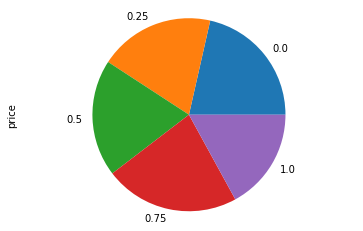

In [36]:
diamonds_wyk.price.groupby(diamonds_wyk.cut).mean().plot(kind='pie')
plt.axis('equal')
plt.show()

Na powyższym wykresie możemy zauważyć, że jakość szlifu diamentu nie wpływa drastycznie na jego cenę.

# -------------------------------------------------

In [37]:
#cel - klasyfikacja diamentów ze względu na zmienną price

In [38]:
diamonds_reg = diamonds.copy()
diamonds_reg.head()

carat   cut  color  clarity  depth  table  price     x     y     z
0   0.23  1.00      6        2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  0.75      6        3   59.8   61.0    326  3.89  3.84  2.31
2   0.23  0.25      6        5   56.9   65.0    327  4.05  4.07  2.31
3   0.29  0.75      2        4   62.4   58.0    334  4.20  4.23  2.63
4   0.31  0.25      1        2   63.3   58.0    335  4.34  4.35  2.75

In [39]:
#tworzymy macierze zmiennych objaśniających (predyktorów) i wektor kolumnowy zmiennej objaśnianej
# kolumna price
y = diamonds_reg.iloc[:, -4]
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [40]:
#badamy tylko zmienne carat, depth i table
X = diamonds_reg.iloc[:, [0,4,5]]
X.head()

carat  depth  table
0   0.23   61.5   55.0
1   0.21   59.8   61.0
2   0.23   56.9   65.0
3   0.29   62.4   58.0
4   0.31   63.3   58.0

In [41]:
#obliczmy wspóczynnik korelacji liniowej Pearsona
corr_P = diamonds_reg[["carat","depth","table","price"]].corr("pearson")
corr_P.shape
corr_P


carat     depth     table     price
carat  1.000000  0.028224  0.181618  0.921591
depth  0.028224  1.000000 -0.295779 -0.010647
table  0.181618 -0.295779  1.000000  0.127134
price  0.921591 -0.010647  0.127134  1.000000

In [42]:
#tworzymy macierz trójkątną i wyświetlamy wspóczynnik korelacji większy od 0.5
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=np.bool), k=1)).stack().sort_values()
corr_P_tri

depth  table   -0.295779
       price   -0.010647
carat  depth    0.028224
table  price    0.127134
carat  table    0.181618
       price    0.921591
dtype: float64

In [43]:
corr_P_tri[abs(corr_P_tri)>0.5]

carat  price    0.921591
dtype: float64

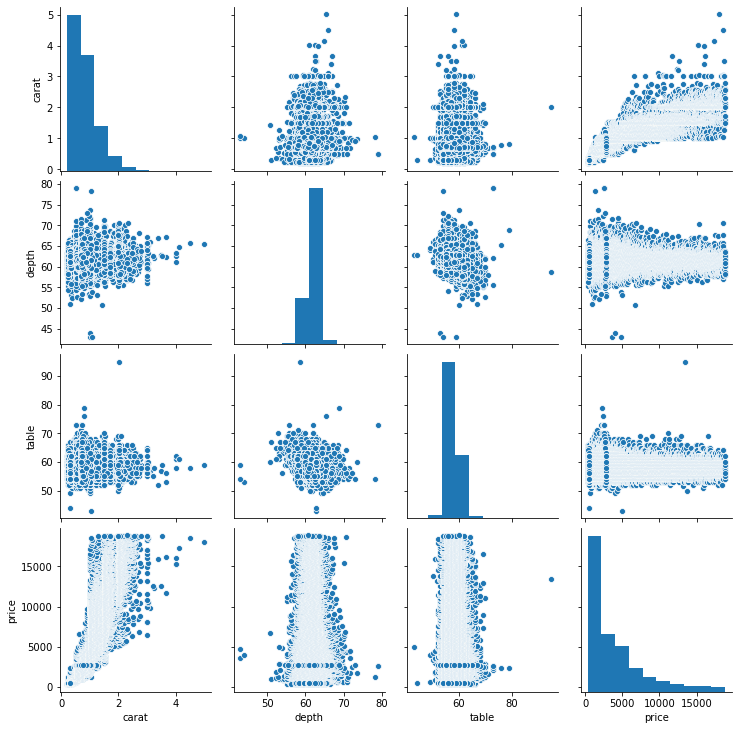

In [44]:
#wizualizacja korelacji przy pomocy seaborn pairplot
sns.pairplot(diamonds_reg[["carat","depth","table","price"]])
plt.show()


Żaden z powyższych wykresów nie potwierdza żeby istniała zależność pomiędzy ceną diamentu a jednym z pozostałych jego parametrów. Możemy przypuszczać, że na ostateczną cenę ma wpływ wiele zmiennych.

# ------Model regresji liniowej-----

In [45]:
#tworzymy model regresji liniowej

import sklearn.linear_model

In [46]:
mnk = sklearn.linear_model.LinearRegression()

In [47]:
mnk.fit(X,y)

LinearRegression()

In [48]:
mnk.intercept_

13003.44052423977

In [49]:
mnk.coef_

array([7858.77050994, -151.23634689, -104.47278016])

In [50]:
x_nowy = X.mean().values.reshape(1,-1)
x_nowy

array([[ 0.79793975, 61.74940489, 57.45718391]])

In [51]:
mnk.predict(x_nowy)

array([3932.79972191])

In [52]:
#dla zbioru wystandaryzowanego, współczynniki regresji nabierają przydatnej interpretacji
#tzn. im większa wartość modułu współczynnika, tym bardziej istotny ma on wpływ na wartość odpowiedzi
X_std = (X-X.mean(axis=0))/X.std(axis=0)
X_std.describe()

carat         depth         table
count  5.394000e+04  5.394000e+04  5.394000e+04
mean   3.774170e-14  5.528923e-13 -3.621533e-14
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -1.261446e+00 -1.308748e+01 -6.470013e+00
25%   -8.395154e-01 -5.231005e-01 -6.521325e-01
50%   -2.066190e-01  3.531645e-02 -2.046032e-01
75%    5.106635e-01  5.239313e-01  6.904554e-01
max    8.885992e+00  1.204128e+01  1.680151e+01

In [53]:
mnk_std = sklearn.linear_model.LinearRegression()
mnk_std.fit(X_std, (y-y.mean())/y.std())

LinearRegression()

In [54]:
pd.Series(mnk_std.coef_, index=X.columns.to_list()).round(4)

carat    0.9338
depth   -0.0543
table   -0.0585
dtype: float64

In [55]:
#ocena jakości modelu
#porównanie wartości dopasowanych, obliczonych za pomocą modelu z wartościami oryginalnymi
y_pred = mnk.predict(X)
y_pred[40:55]

array([ 490.6946742 ,  505.81830889, -664.36464904, -367.26695133,
        124.75791001, -214.08532278,  425.83794112,   18.89246719,
       -873.49441569, -165.92909339, -693.58766843, -192.1022593 ,
        561.95065332, -643.21018097, -713.25770377])

In [56]:
y[40:55]

40    403
41    403
42    403
43    403
44    403
45    403
46    403
47    403
48    404
49    404
50    404
51    404
52    404
53    404
54    404
Name: price, dtype: int64

Żadna z wartości wyliczonych za pomocą regresji nie jest bliska wartościom oryginalnym. Model ten okazał się niewłaściwy.

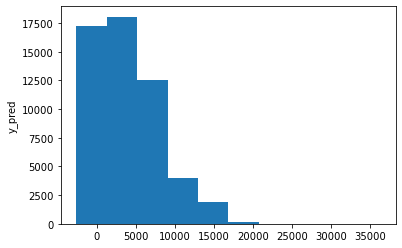

In [57]:
plt.hist(y_pred)
plt.ylabel('y_pred')
plt.show()

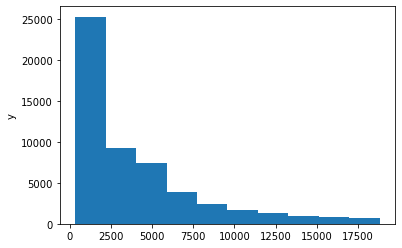

In [58]:
plt.hist(y)
plt.ylabel('y')
plt.show()

Niedopasowanie modelu potwierdzają także histogramy.

In [57]:
#współczynnik determinacji R2
mnk.score(X,y)

sklearn.metrics.r2_score(y, y_pred)

0.8536762884061408

In [59]:
# dzielimy zbiór na próbę uczącą (80%) i testową (20%)
X_ucz, X_test, y_ucz, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=12345)
print(X_ucz.shape)
print(X_test.shape)
print(y_ucz.shape)
print(y_test.shape)

(43152, 3)
(10788, 3)
(43152,)
(10788,)


In [60]:
#stworzymy funkcję, która dopasowuje model regresji liniowej do danej próby
#oraz oblicza miary błędów dopasowania
def fit_regression(X_ucz, X_test, y_ucz, y_test):
    r = sklearn.linear_model.LinearRegression()
    r.fit(X_ucz, y_ucz)
    y_ucz_pred = r.predict(X_ucz)
    y_test_pred = r.predict(X_test)
    r2 = sklearn.metrics.r2_score
    mse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    return {
        "r_score_u": r2(y_ucz, y_ucz_pred),
        "r_score_t": r2(y_test, y_test_pred),
        "MSE_u": mse(y_ucz, y_ucz_pred),
        "MSE_t": mse(y_test, y_test_pred),
        "MAE_u": mae(y_ucz, y_ucz_pred),
        "MAE_t": mae(y_test, y_test_pred)
    }


In [61]:
#przedstawiamy działanie powyższej funkcji oraz wyniki
params = ["Reg. liniowa"]
res = [fit_regression(X_ucz, X_test, y_ucz, y_test)]
pd.DataFrame(res, index=params)


r_score_u  r_score_t         MSE_u         MSE_t       MAE_u  \
Reg. liniowa   0.852489   0.858475  2.358985e+06  2.208746e+06  999.488177   

                   MAE_t  
Reg. liniowa  982.242431

# ----Model KNN----

In [62]:
diamonds_knn = diamonds.copy()
diamonds_knn.head()

carat   cut  color  clarity  depth  table  price     x     y     z
0   0.23  1.00      6        2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  0.75      6        3   59.8   61.0    326  3.89  3.84  2.31
2   0.23  0.25      6        5   56.9   65.0    327  4.05  4.07  2.31
3   0.29  0.75      2        4   62.4   58.0    334  4.20  4.23  2.63
4   0.31  0.25      1        2   63.3   58.0    335  4.34  4.35  2.75

In [63]:
# tworzymy nową zmienną "wartość" na podstawie zmiennej price.
diamonds_knn["wartosc"] = pd.cut(diamonds_knn["price"], [326, 4500, 9000, 14000, 18823], right=False, labels=["tanie", "przeciętne", "drogie", "bardzo drogie"])
diamonds_knn["wartosc"].value_counts()

tanie            37033
przeciętne       10608
drogie            4140
bardzo drogie     2158
Name: wartosc, dtype: int64

In [64]:
diamonds_knn.iloc[100:120,:]

carat   cut  color  clarity  depth  table  price     x     y     z  \
100   0.75  0.50      7        3   63.2   56.0   2760  5.80  5.75  3.65   
101   0.75  0.75      6        3   59.9   54.0   2760  6.00  5.96  3.58   
102   0.74  1.00      4        3   61.6   55.0   2760  5.80  5.85  3.59   
103   0.75  0.75      4        4   61.7   58.0   2760  5.85  5.79  3.59   
104   0.80  1.00      2        5   62.9   56.0   2760  5.94  5.87  3.72   
105   0.75  1.00      4        3   62.2   55.0   2760  5.87  5.80  3.63   
106   0.80  0.75      4        3   63.0   59.0   2760  5.90  5.81  3.69   
107   0.74  1.00      2        6   62.3   55.0   2761  5.77  5.81  3.61   
108   0.81  1.00      5        2   58.8   57.0   2761  6.14  6.11  3.60   
109   0.59  1.00      6        6   62.0   55.0   2761  5.38  5.43  3.35   
110   0.80  1.00      5        2   61.4   57.0   2761  5.96  6.00  3.67   
111   0.74  1.00      6        2   62.2   56.0   2761  5.80  5.84  3.62   
112   0.90  0.75      2        4   63.0   58.0   2761  6.16  6.12  3.87   
113   0.74  0.50      4        3   62.2   59.0   2762  5.73  5.82  3.59   
114   0.73  1.00      5        4   62.6   56.0   2762  5.77  5.74  3.60   
115   0.73  1.00      5        4   62.7   53.0   2762  5.80  5.75  3.62   
116   0.80  0.75      5        2   61.7   58.0   2762  5.98  5.94  3.68   
117   0.71  1.00      4        4   62.4   54.0   2762  5.72  5.76  3.58   
118   0.70  1.00      6        4   60.7   58.0   2762  5.73  5.76  3.49   
119   0.80  1.00      5        2   59.9   59.0   2762  6.01  6.07  3.62   

    wartosc  
100   tanie  
101   tanie  
102   tanie  
103   tanie  
104   tanie  
105   tanie  
106   tanie  
107   tanie  
108   tanie  
109   tanie  
110   tanie  
111   tanie  
112   tanie  
113   tanie  
114   tanie  
115   tanie  
116   tanie  
117   tanie  
118   tanie  
119   tanie

In [65]:
#przygotowujemy dane do analizy
X = diamonds_knn.iloc[:, [0,1,2,3,4,5,6]]
X.head()

carat   cut  color  clarity  depth  table  price
0   0.23  1.00      6        2   61.5   55.0    326
1   0.21  0.75      6        3   59.8   61.0    326
2   0.23  0.25      6        5   56.9   65.0    327
3   0.29  0.75      2        4   62.4   58.0    334
4   0.31  0.25      1        2   63.3   58.0    335

In [66]:
y = diamonds_knn["wartosc"]
y[0:10]

0    tanie
1    tanie
2    tanie
3    tanie
4    tanie
5    tanie
6    tanie
7    tanie
8    tanie
9    tanie
Name: wartosc, dtype: category
Categories (4, object): ['tanie' < 'przeciętne' < 'drogie' < 'bardzo drogie']

In [67]:
# przekodowujemy wartości zmiennej y na zbiór liczb całkowitych
yk = y.cat.codes.values
yk[1:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [68]:
#kilka kodów diamentów wybranych losowo
i = np.random.choice(np.arange(len(yk)), 10, replace=False)
yk[i]
y[i].values

['tanie', 'tanie', 'przeciętne', 'przeciętne', 'tanie', 'tanie', 'tanie', 'tanie', 'tanie', 'tanie']
Categories (4, object): ['tanie' < 'przeciętne' < 'drogie' < 'bardzo drogie']

In [69]:
#Podział zbioru na próbę uczącą i testową
import sklearn.model_selection
np.arange(4)
np.arange(X.shape[0])

array([    0,     1,     2, ..., 53937, 53938, 53939])

In [70]:
idx_ucz, idx_test = sklearn.model_selection.train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=12345)
X_ucz, X_test = X.iloc[idx_ucz, :], X.iloc[idx_test, :]
y_ucz, y_test = y[idx_ucz], y[idx_test]
yk_ucz, yk_test = yk[idx_ucz], yk[idx_test]

In [71]:
X_ucz.shape, X_test.shape, y_ucz.shape, y_test.shape


((43152, 7), (10788, 7), (43152,), (10788,))

In [72]:
y_ucz.value_counts()

tanie            29562
przeciętne        8525
drogie            3327
bardzo drogie     1737
Name: wartosc, dtype: int64

In [87]:
29562/(29562+8525+3327+1737)

0.6850826168570833

Diamenty tanie stanowią około 69% wszsytkich diamentów.

In [73]:
y_test.value_counts()

tanie            7471
przeciętne       2083
drogie            813
bardzo drogie     421
Name: wartosc, dtype: int64

In [74]:
#metoda k-najbliższych sąsiadów
import sklearn.neighbors


In [75]:
knn = sklearn.neighbors.KNeighborsClassifier() 
knn.fit(X_ucz, yk_ucz)

KNeighborsClassifier()

In [76]:
yk_pred_ucz = knn.predict(X_ucz)

In [77]:
yk_pred_ucz[0:20]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int8)

In [78]:
yk_ucz[0:20]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int8)

In [79]:
yk_pred = knn.predict(X_test)

In [80]:
yk_pred[0:20]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 3],
      dtype=int8)

In [81]:
yk_test[0:20]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 3],
      dtype=int8)

In [82]:
#ocena jakości klasyfikatora
#np. procent poprawnie zaklasyfikowanych obserwacji
import sklearn.metrics



In [83]:
sklearn.metrics.accuracy_score(yk_ucz, yk_pred_ucz)

0.9999768261030775

In [84]:
sklearn.metrics.accuracy_score(yk_test, yk_pred)

0.99990730441231

Model w prawie 100% poprawnie rozpoznaje diamenty, zarówno na zbiorze treningowym jak i testowym. (Bazując na metryce accuracy)

In [88]:
#macierz pomyłek [[true negative, false positive], [false negative, true positive]]
sklearn.metrics.confusion_matrix(yk_test, yk_pred)


array([[7471,    0,    0,    0],
       [   0, 2082,    1,    0],
       [   0,    0,  813,    0],
       [   0,    0,    0,  421]], dtype=int64)

In [85]:
y_test.value_counts()

tanie            7471
przeciętne       2083
drogie            813
bardzo drogie     421
Name: wartosc, dtype: int64

In [86]:
7471/(7471+2083+813+421)

0.6925287356321839

Ponownie wyszło, że około 69% diamentów to diamenty tanie.

In [88]:

#inne miary oceny jakości klasyfikatora: precyzja - precision_score, czułość - recall_score,
#miara F1, czyli średnia harmoniczna z czułości i precyzji - f1_score
#funkcja licząca powyższe metryki


def fit_classifier(alg, X_ucz, X_test, y_ucz, y_test):
    """
    Metoda trenująca wybrany model alg na zbiorze uczącym (X_ucz, y_ucz),
    dokonująca predykcji na zbioerze testowym (X_test, y_test) i
    walidująca go poprzez cztery wybrane metryki: accuracy, precision, recall i F1.
    
    Parameters:
        alg: obiekt reprezentujący wybrany algorytm, np. sklearn.neighbors.classification.KNeighborsClassifier
            algorytm użyty do klasyfikacji
        X_ucz: pandas.core.frame.DataFrame
            zbiór treningowy - predyktory
        X_test: pandas.core.frame.DataFrame
            zbiór testowy - predyktory
        y_ucz: pandas.core.series.Series
            zbiór treningowy - zmienna celu
        y_test: pandas.core.series.Series
            zbiór testowy - zmienna celu
    
    Returns:
        dict: słownik zawierający klucze ACC, P, R i F1,
            dla których wyznaczono wartości walidujące model, takie jak: accuracy, precision, recall i F1.
    """
      
    alg.fit(X_ucz, y_ucz)
    y_pred_ucz =alg.predict(X_ucz)
    y_pred = alg.predict(X_test)
    return {
        "ACC_ucz": sklearn.metrics.accuracy_score(y_ucz, y_pred_ucz),
        "ACC_test": sklearn.metrics.accuracy_score(y_test, y_pred),
        "P_ucz":   sklearn.metrics.precision_score(y_ucz, y_pred_ucz, average="weighted"),
        "P_test":   sklearn.metrics.precision_score(y_test, y_pred, average="weighted"),
        "R_ucz":   sklearn.metrics.recall_score(y_ucz, y_pred_ucz, average="weighted"),
        "R_test":   sklearn.metrics.recall_score(y_test, y_pred, average="weighted"),
       # "F1_ucz":  sklearn.metrics.f1_score(y_ucz, y_pred_ucz, average="weighted"),
       # "F1_test":  sklearn.metrics.f1_score(y_ucz, y_pred, average="weighted")
    }



In [89]:

#zastosowanie funkcji fit_classifier
pd.Series(fit_classifier(sklearn.neighbors.KNeighborsClassifier(), X_ucz, X_test, yk_ucz, yk_test))


C:\Users\sebma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACC_ucz     0.999977
ACC_test    0.999907
P_ucz       0.999954
P_test      0.999907
R_ucz       0.999977
R_test      0.999907
dtype: float64

In [90]:
#tworzymy ramkę danych
params = ["knn"]
res = [fit_classifier(sklearn.neighbors.KNeighborsClassifier(), X_ucz, X_test, yk_ucz, yk_test)]
pd.DataFrame(res, index=params)


C:\Users\sebma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACC_ucz  ACC_test     P_ucz    P_test     R_ucz    R_test
knn  0.999977  0.999907  0.999954  0.999907  0.999977  0.999907

Nie dość, że wartości metryk są bliskie 100% to także dla każdej metryki różnice pomiędzy zbiorem testowym a treningowym są praktycznie zerowe. Oznacza to poprawność zastosowanego modelu.

In [91]:
#sprawdzamy wyniki dla danych po standaryzacji
m = X.mean()
s = X.std()
params.append("knn_std")
res.append(fit_classifier(sklearn.neighbors.KNeighborsClassifier(), (X_ucz-m)/s, (X_test-m)/s, yk_ucz, yk_test))
pd.DataFrame(res, index=params)


C:\Users\sebma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACC_ucz  ACC_test     P_ucz    P_test     R_ucz    R_test
knn      0.999977  0.999907  0.999954  0.999907  0.999977  0.999907
knn_std  0.968970  0.951149  0.968939  0.951257  0.968970  0.951149

Dla danych wystandaryzowanych wszystkie parametry się pogorszyły.

In [92]:

# wyznaczamy macierz pomyłek
knn.fit((X_ucz-m)/s, yk_ucz)
yk_pred_std = knn.predict((X_test-m)/s)
sklearn.metrics.confusion_matrix(yk_test, yk_pred_std)


array([[7294,  177,    0,    0],
       [ 165, 1866,   52,    0],
       [   0,   64,  714,   35],
       [   0,    0,   34,  387]], dtype=int64)

In [94]:
# normalizacja 
params.append("knn_norm")
res.append(fit_classifier(sklearn.neighbors.KNeighborsClassifier(), (X_ucz-X_ucz.min())/(X_ucz.max()-X_ucz.min()), (X_test-X_test.min())/(X_test.max()-X_test.min()), yk_ucz, yk_test))
pd.DataFrame(res, index=params)


C:\Users\sebma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACC_ucz  ACC_test     P_ucz    P_test     R_ucz    R_test
knn       0.999977  0.999907  0.999954  0.999907  0.999977  0.999907
knn_std   0.968970  0.951149  0.968939  0.951257  0.968970  0.951149
knn_norm  0.984983  0.963385  0.984928  0.964235  0.984983  0.963385
knn_norm  0.984983  0.963385  0.984928  0.964235  0.984983  0.963385

Normalizacja danych również pogarsza parametry.

In [96]:
knn.fit((X_ucz-X_ucz.min())/(X_ucz.max()-X_ucz.min()), yk_ucz)
yk_pred_norm = knn.predict((X_test-X_test.min())/(X_test.max()-X_test.min()))
sklearn.metrics.confusion_matrix(yk_test, yk_pred_norm)


array([[7283,  188,    0,    0],
       [  80, 1945,   58,    0],
       [   0,   24,  765,   24],
       [   0,    0,   21,  400]], dtype=int64)

In [96]:
#szukamy najlepszej liczby sąsiadów
X_ucz_std = (X_ucz-m)/s
X_test_std = (X_test-m)/s


In [97]:
tab_train = list()
tab_test = list()
for i in range(1,26):
    klasyfikator = sklearn.neighbors.KNeighborsClassifier(n_neighbors=i) #tworzenie modelu
    print(klasyfikator)


KNeighborsClassifier(n_neighbors=1)
KNeighborsClassifier(n_neighbors=2)
KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifier(n_neighbors=4)
KNeighborsClassifier()
KNeighborsClassifier(n_neighbors=6)
KNeighborsClassifier(n_neighbors=7)
KNeighborsClassifier(n_neighbors=8)
KNeighborsClassifier(n_neighbors=9)
KNeighborsClassifier(n_neighbors=10)
KNeighborsClassifier(n_neighbors=11)
KNeighborsClassifier(n_neighbors=12)
KNeighborsClassifier(n_neighbors=13)
KNeighborsClassifier(n_neighbors=14)
KNeighborsClassifier(n_neighbors=15)
KNeighborsClassifier(n_neighbors=16)
KNeighborsClassifier(n_neighbors=17)
KNeighborsClassifier(n_neighbors=18)
KNeighborsClassifier(n_neighbors=19)
KNeighborsClassifier(n_neighbors=20)
KNeighborsClassifier(n_neighbors=21)
KNeighborsClassifier(n_neighbors=22)
KNeighborsClassifier(n_neighbors=23)
KNeighborsClassifier(n_neighbors=24)
KNeighborsClassifier(n_neighbors=25)


In [98]:
    klasyfikator.fit(X_ucz_std, yk_ucz) #trenowanie modelu



KNeighborsClassifier(n_neighbors=25)

In [99]:
    Y_tr_pred = klasyfikator.predict(X_ucz_std)
    Y_pred = klasyfikator.predict(X_test_std) #klasyfikacja zmiennej celu dla zbioru testowego
    


In [100]:
    tab_train.append(sklearn.metrics.precision_score(yk_ucz, Y_tr_pred, average="weighted"))
    tab_test.append(sklearn.metrics.precision_score(yk_test, Y_pred, average="weighted"))
	


C:\Users\sebma\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


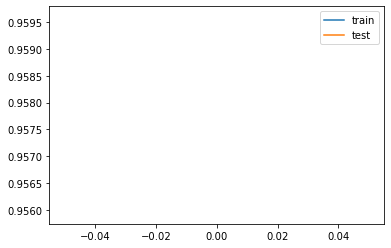

In [101]:
#i prezentujemy wyniki
plt.plot(tab_train, label='train')
plt.plot(tab_test, label='test')
plt.legend()
plt.show()
